<a href="https://colab.research.google.com/github/LeisaSousa/Teste/blob/main/Desafio_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 87.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=1cafa1b220edc8522600843e315f49f8e4e095a997f7647da940d303ed4bcbc9
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [178]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import json as json
from scipy.stats import norm

In [98]:
 df = pd.read_csv("/content/populacao_brasileira.csv")

In [99]:
df.head(5)

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [100]:
df.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


1-**Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.**

In [101]:
# Verifique os valores únicos na coluna de nível de inglês
print(df['nível de proficiência em inglês'].unique())

['Intermediário' 'Básico' 'Avançado']


In [109]:
# Contar o total de pessoas
total_pessoas = len(df)

# Contar o número de pessoas fluentes (avançado)
num_fluentes = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

# Calcular a probabilidade de ser fluente
probabilidade_fluente = num_fluentes / total_pessoas

# Calcular a probabilidade complementar
probabilidade_nao_fluente = 1 - probabilidade_fluente

# Exibir o resultado
print(f"A probabilidade de uma pessoa não ser fluente em inglês é: {probabilidade_nao_fluente:.2f}")

A probabilidade de uma pessoa não ser fluente em inglês é: 0.66


**2-Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?**

In [112]:
print(df['estado'].unique())

['MA' 'BA' 'AM' 'CE' 'SE' 'DF' 'PI' 'AP' 'AC' 'SC' 'SP' 'GO' 'RO' 'PA'
 'MS' 'RN' 'RS' 'RR' 'PR' 'MG' 'MT' 'TO' 'PB' 'PE' 'RJ' 'AL' 'ES']


In [115]:
estados = ['AL', 'PA']
df_filtrado = df[df['estado'].isin(estados)]

# Contar o número total de pessoas nos estados de interesse
total_pessoas_estados = len(df_filtrado)

# Filtrar para pessoas com renda > a 5 mil
df_renda_alta = df_filtrado[df_filtrado['renda'] > 5000]

# Contar o número de pessoas com renda > a 5 mil
num_renda_alta = len(df_renda_alta)

# Calcular a probabilidade de ter renda > a 5 mil
probabilidade_renda_alta = num_renda_alta / total_pessoas_estados

# Exibir o resultado
print(f"A probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais é: {probabilidade_renda_alta:.2f}")

A probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais é: 0.05


**3-Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?**

In [119]:
# Verifique os valores únicos na coluna de escolaridade
print(df['escolaridade'].unique())

['Fundamental' 'Superior' 'Médio' 'Pós-graduação']


In [121]:
estados_am = ['AM']
df_am = df[df['estado'].isin(estados_am)]

total_pessoas_amazonas = len(df_am)
print(f"Total de pessoas no Amazonas: {total_pessoas_amazonas}")

# Contar o número de pessoas com ensino superior completo
num_superior_completo = df_am[df_am['escolaridade'] == 'Superior'].shape[0]
print(f"Número de pessoas com ensino superior completo no Amazonas: {num_superior_completo}")

# Calcular a probabilidade de ter ensino superior completo no Amazonas
probabilidade_superior_completo = num_superior_completo / total_pessoas_amazonas
print(f"A probabilidade de uma pessoa no Amazonas ter ensino superior completo é: {probabilidade_superior_completo:.2f}")

# A probabilidade da quinta pessoa ser de ensino superior completo é a mesma
# probabilidade de qualquer pessoa ser de ensino superior completo
print(f"A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é: {probabilidade_superior_completo:.2f}")

Total de pessoas no Amazonas: 38
Número de pessoas com ensino superior completo no Amazonas: 9
A probabilidade de uma pessoa no Amazonas ter ensino superior completo é: 0.24
A probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo é: 0.24


**4-Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?**

In [129]:
# Filtrar dados para garantir que a coluna 'renda' seja numérica
df['renda'] = pd.to_numeric(df['renda'], errors='coerce')

# Remover registros com valores de renda faltantes ou inválidos
df = df.dropna(subset=['renda'])

# Definir faixas de renda de 1.500 reais
faixas = np.arange(0, df['renda'].max() + 1500, 1500)

# Contar o número de pessoas em cada faixa de renda
contagem_faixas = pd.cut(df['renda'], bins=faixas).value_counts().sort_index()

# Exibir as faixas de renda e suas contagens
print("Distribuição de renda por faixa:")
print(contagem_faixas)

Distribuição de renda por faixa:
renda
(0.0, 1500.0]        55
(1500.0, 3000.0]    414
(3000.0, 4500.0]    442
(4500.0, 6000.0]     89
Name: count, dtype: int64


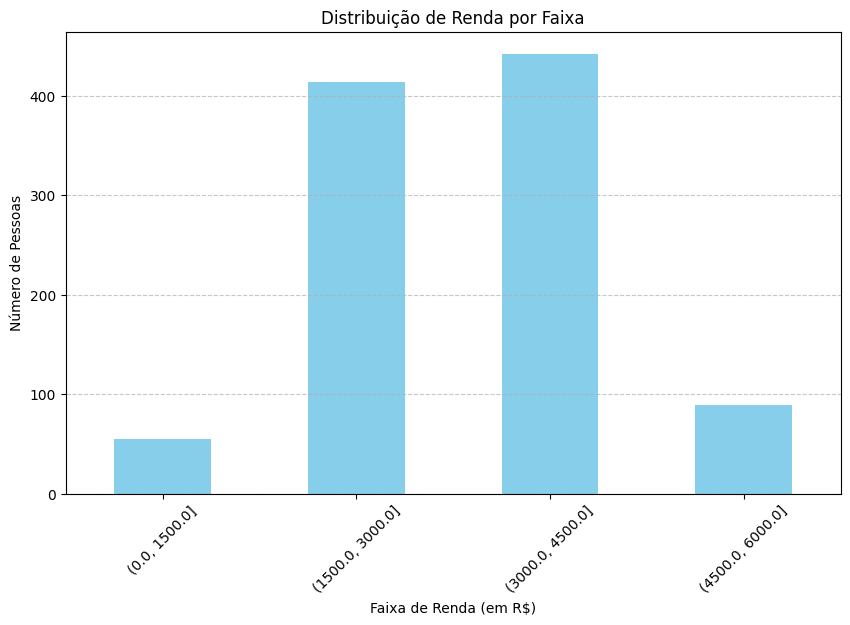

In [130]:
# Plotar a distribuição de renda
plt.figure(figsize=(10, 6))
contagem_faixas.plot(kind='bar', color='skyblue')
plt.xlabel('Faixa de Renda (em R$)')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Renda por Faixa')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

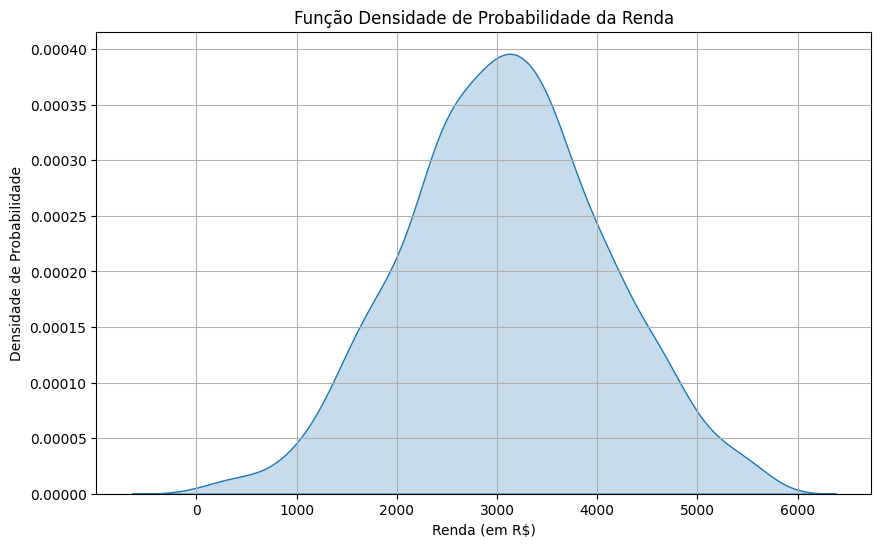

In [131]:
# Estimar e plotar a função densidade de probabilidade (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['renda'], fill=True)
plt.xlabel('Renda (em R$)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Função Densidade de Probabilidade da Renda')
plt.grid(True)
plt.show()

**5-Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.**

In [132]:
# Calcular média e variância
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f"Média da renda: R${media_renda:.2f}")
print(f"Variância da renda: R${variancia_renda:.2f}")

Média da renda: R$3082.54
Variância da renda: R$993156.23


<Axes: xlabel='renda', ylabel='Density'>

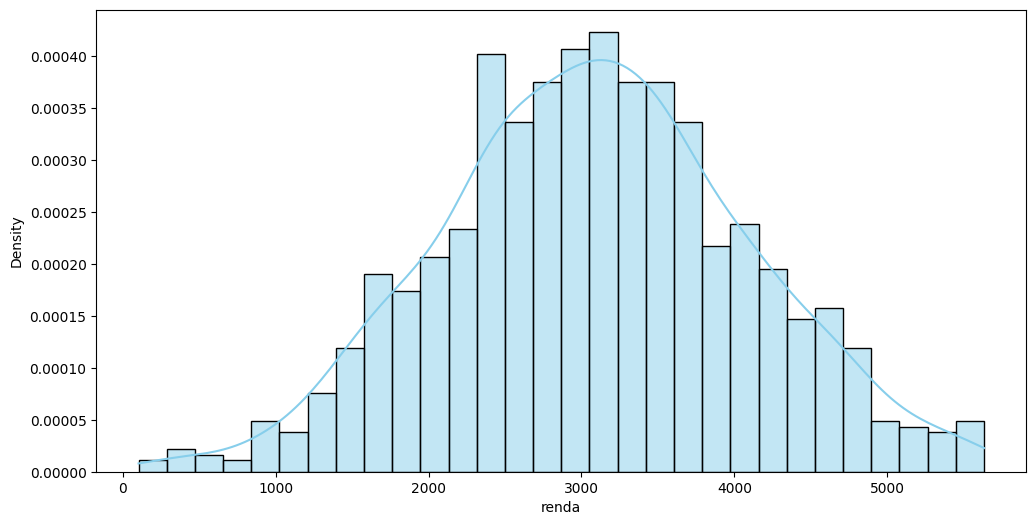

In [134]:
# Gerar dados para a distribuição normal
x = np.linspace(df['renda'].min(), df['renda'].max(), 100)
y = (1 / (np.sqrt(2 * np.pi * variancia_renda))) * np.exp(-0.5 * ((x - media_renda) ** 2) / variancia_renda)

# Plotar o histograma da renda
plt.figure(figsize=(12, 6))
sns.histplot(df['renda'], bins=30, kde=True, color='skyblue', stat='density', label='Distribuição de Renda')


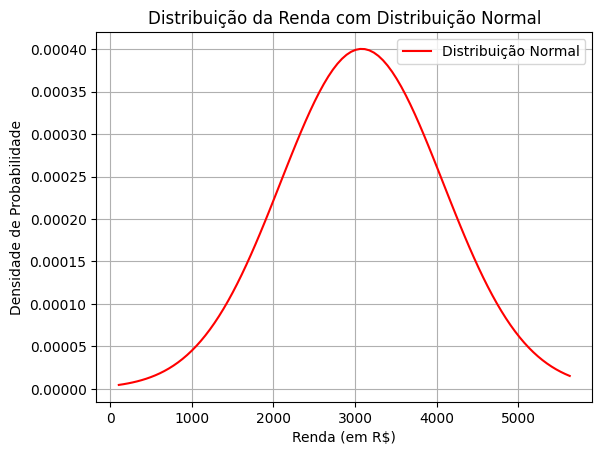

In [135]:
# Plotar a distribuição normal
plt.plot(x, y, color='red', label='Distribuição Normal')
plt.xlabel('Renda (em R$)')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição da Renda com Distribuição Normal')
plt.legend()
plt.grid(True)
plt.show()

**6-Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?**


In [139]:
from scipy.stats import norm

In [158]:
# Garantir que a coluna de escolaridade é numérica e contém o nível 'Pós-Graduação'
df['escolaridade'] = df['escolaridade'].astype(str)

# Calcular a proporção de pessoas com pós-graduação
total_pessoas = len(df)
num_pos_grad = df[df['escolaridade'] == 'Pós-graduação'].shape[0]
proporcao_pos_grad = num_pos_grad / total_pessoas

# Parâmetros da distribuição normal
n = 1_000_000  # Tamanho da amostra
k = 243_000  # Número desejado de pessoas com pós-graduação

# Calcular a média e o desvio padrão
media = proporcao_pos_grad * n
variancia = n * proporcao_pos_grad * (1 - proporcao_pos_grad)
desvio_padrao = np.sqrt(variancia)

print(f"Proporção de pessoas com pós-graduação na amostra: {proporcao_pos_grad:.4f}")

Proporção de pessoas com pós-graduação na amostra: 0.2530


In [165]:
# Proporção de pessoas com pós-graduação é 0.2530
proporcao_pos_grad = 0.2530

# Cálculo da probabilidade de encontrar 243.000 pessoas com pós-graduação ou menos
z = (k - media) / desvio_padrao
probabilidade = norm.cdf(z)

# Probabilidade de encontrar exatamente 243.000 pessoas (intervalo de continuidade)
probabilidade_exata = norm.cdf((k + 0.5 - media) / desvio_padrao) - norm.cdf((k - 0.5 - media) / desvio_padrao)

print(f"Média esperada na população de 1 milhão: {media:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Probabilidade de encontrar {k} pessoas com pós-graduação ou menos: {probabilidade:.4f}")
print(f"Probabilidade aproximada de encontrar exatamente {k} pessoas com pós-graduação: {probabilidade_exata:.4f}")

Média esperada na população de 1 milhão: 253000.00
Desvio padrão: 434.73
Probabilidade de encontrar 243000 pessoas com pós-graduação ou menos: 0.0000
Probabilidade aproximada de encontrar exatamente 243000 pessoas com pós-graduação: 0.0000


**7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.**

In [171]:
# Calcular a frequência de cada nível de escolaridade
frequencias = df['escolaridade'].value_counts()

# Calcular a densidade de probabilidade
densidades = frequencias / frequencias.sum()

# Calcular a densidade acumulada
densidade_acumulada = densidades.sort_index().cumsum()

# Exibir a densidade acumulada
print(densidade_acumulada)

escolaridade
Fundamental      0.266
Médio            0.504
Pós-graduação    0.757
Superior         1.000
Name: count, dtype: float64


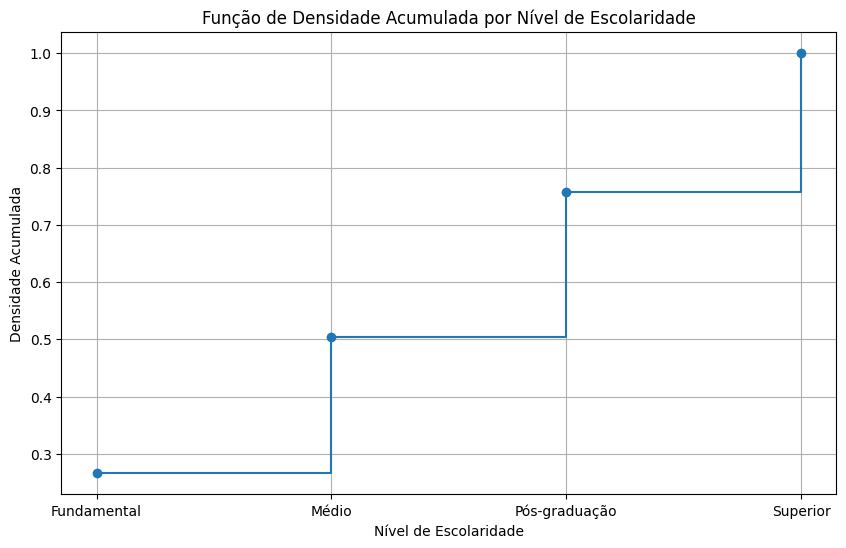

In [172]:
# Plotar a função de densidade acumulada
plt.figure(figsize=(10, 6))
plt.step(densidade_acumulada.index, densidade_acumulada.values, where='post', marker='o')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Densidade Acumulada')
plt.title('Função de Densidade Acumulada por Nível de Escolaridade')
plt.grid(True)
plt.show()

**8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?**


In [180]:
from scipy import stats

In [181]:
# Calcular a proporção amostral para nível de inglês intermediário
n = df.shape[0]  # Tamanho da amostra
p = df['nível de proficiência em inglês'].value_counts(normalize=True).get('Intermediário', 0)  # Proporção de nível intermediário


In [182]:
# Definir o nível de confiança e obter o valor crítico z
nivel_confianca = 0.95
z = stats.norm.ppf((1 + nivel_confianca) / 2)

In [183]:
# Calcular a margem de erro
margem_erro = z * np.sqrt((p * (1 - p)) / n)


In [184]:
print(f"Proporção amostral de nível de inglês intermediário: {p:.4f}")
print(f"Margem de erro amostral: {margem_erro:.4f}")

Proporção amostral de nível de inglês intermediário: 0.3290
Margem de erro amostral: 0.0291


**9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?**


In [186]:
# Calcular a média e o desvio padrão da renda
media_renda = df['renda'].mean()
desvio_padrao_renda = df['renda'].std()

In [187]:
# Novo valor de renda (média + R$1.000)
novo_valor_renda = media_renda + 1000

In [192]:
# Calcular a probabilidade de uma pessoa ter renda >= novo_valor_renda
probabilidade_renda_maior = 1 - stats.norm.cdf(novo_valor_renda, loc=media_renda, scale=desvio_padrao_renda)

In [193]:
# Calcular a probabilidade de encontrar 60 pessoas com renda maior ou igual ao novo valor
n_pessoas = 1000000  # Tamanho da população considerado
pessoas_necessarias = 60

In [196]:
# Calcular a probabilidade de encontrar exatamente 60 pessoas com a renda >= novo_valor_renda
# Usando a distribuição binomial
probabilidade = stats.binom.pmf(pessoas_necessarias, n_pessoas, probabilidade_renda_maior)

In [190]:
# Usar a distribuição binomial para calcular a probabilidade de encontrar exatamente 60 pessoas com renda >= novo_valor_renda
probabilidade = stats.binom.pmf(pessoas_necessarias, n_pessoas, probabilidade_renda_maior)

In [197]:
print(f"Média da renda: R${media_renda:.2f}")
print(f"Desvio padrão da renda: R${desvio_padrao_renda:.2f}")
print(f"Novo valor de renda: R${novo_valor_renda:.2f}")
print(f"Probabilidade de encontrar exatamente 60 pessoas com renda maior ou igual a R${novo_valor_renda:.2f}: {probabilidade:.10f}")

Média da renda: R$3082.54
Desvio padrão da renda: R$996.57
Novo valor de renda: R$4082.54
Probabilidade de encontrar exatamente 60 pessoas com renda maior ou igual a R$4082.54: 0.0000000000


**10. Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?**

In [204]:
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']
pessoas_sudeste_homem_fundamental_renda = df[
    (df['estado'].isin(estados_sudeste)) &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
]

In [205]:
# Número de pessoas que atendem a todas as condições
num_pessoas_especificas = pessoas_sudeste_homem_fundamental_renda.shape[0]

In [207]:
# Número total de pessoas no Sudeste
total_pessoas_sudeste = df[df['estado'].isin(estados_sudeste)].shape[0]

In [208]:
# Calcular a probabilidade
if total_pessoas_sudeste > 0:
    probabilidade = num_pessoas_especificas / total_pessoas_sudeste
else:
    probabilidade = 0

print(f"Proporção de pessoas do Sudeste que são homens, com ensino fundamental e renda maior que R$2000: {probabilidade:.4f}")

Proporção de pessoas do Sudeste que são homens, com ensino fundamental e renda maior que R$2000: 0.1210
